Aula de Python sobre como montar uma estratégia de alocação de recursos entre três fundos de investimentos.
Tirada do canal do YouTube: Código Quant - Finanças Quantitativas

Esse código mostra a melhor estratégia de alocação entre três já pré-determinadas de alocação fixas, conforme a seguinte tabela:

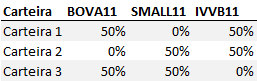

Depois quero evoluir para um sistema de alocação eficiente de recursos entre estes fundos (ou até mais), mas de forma automática e não pré-determinada

In [1]:
import pandas as pd
import investpy as inv
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.options.plotting.backend = 'plotly'

In [2]:
inv.get_etfs_list('brazil')

['Ishares Ibovespa',
 'It Now Ibovespa Fundo De Indice',
 'ETF Bradesco Ibovespa Fdo De Indice',
 'XP MALLS FDO INV IMOB FII',
 'iShares BM&FBOVESPA Small Cap',
 'Fundo de Invest Ishares SP 500',
 'Malls Brasil Plural Fundo De Investimento Imobilia',
 'Fdo Inv Imob VBI Logístico',
 'It Now SP500 TRN',
 'General Shopping e Outlets do Brasil Fundo de Inve',
 'It Now PIBB IBrX-50',
 'Fundo de Investimento Imobiliario FII UBS BR Receb',
 'It Now IDIV',
 'It Now IFNC',
 'Fundo de FI Imobiliario Kinea FII',
 'FI Imobiliario - Ourinvest Fundo de Fundos',
 'iShares IBrX Brasil',
 'BB SP Dividendos',
 'It Now IMAT',
 'iShares Carbono Eficiente (ICO2) Brasil',
 'Caixa Rio Bravo Fundo de Fundos de Investimento Im',
 'It Now IGCT',
 'CAIXA Ibovespa',
 'It Now ISE',
 'Votorantim Securities Master FII-FII',
 'Brazil Realty Fundo de Investimento Imobiliario FI',
 'Loft I - Fdo Inv Imob']

In [3]:
etfs = ['Ishares Ibovespa', 'iShares BM&FBOVESPA Small Cap','Fundo de Invest Ishares SP 500']
data_inicio = '01/04/2016'
data_fim = '20/04/2021'

In [4]:
ibov = inv.get_index_historical_data('Bovespa', 'brazil',
                                    from_date = data_inicio,
                                    to_date = data_fim)[['Close']].pct_change().dropna()
ibov.columns = ['ibov']

In [5]:
cotacoes = pd.DataFrame(columns=etfs)

for etf in etfs:
    try:
        ativo = inv.get_etf_historical_data(etf, 'brazil',
                                            from_date = data_inicio,
                                            to_date = data_fim)['Close']
        cotacoes[etf] = ativo
    except:
        print(f'Não foi possivel obter cotações de {etf}')
        cotacoes.drop(etf, axis=1, inplace=True)

In [6]:
cotacoes.columns = ['BOVA11', 'SMALL11', 'IVVB11']

In [7]:
cotacoes

,BOVA11,SMALL11,IVVB11
Date,,,
2016-04-01,49.12,44.86,75.97
2016-04-04,47.33,43.82,76.88
2016-04-05,47.36,43.98,77.39
2016-04-06,46.82,43.20,77.51
2016-04-07,47.05,43.30,77.45
...,...,...,...
2021-04-14,115.60,140.50,254.29
2021-04-15,116.20,140.91,254.95
2021-04-16,116.46,141.75,255.00


In [8]:
retorno = cotacoes.pct_change().dropna()

In [9]:
retorno

,BOVA11,SMALL11,IVVB11
Date,,,
2016-04-04,-0.036441,-0.023183,0.011978
2016-04-05,0.000634,0.003651,0.006634
2016-04-06,-0.011402,-0.017735,0.001551
2016-04-07,0.004912,0.002315,-0.000774
2016-04-08,0.039745,0.029330,-0.021175
...,...,...,...
2021-04-14,0.008110,0.003070,-0.011314
2021-04-15,0.005190,0.002918,0.002595
2021-04-16,0.002238,0.005961,0.000196


In [10]:
# BOVA11 | SMALL11 | IVVB11
pesos = [[0.5, 0.0, 0.5],
         [0.0, 0.5, 0.5],
         [0.5, 0.5, 0.0]]

In [11]:
carteiras = pd.DataFrame()

for i, peso in enumerate(pesos):
    carteiras[f'carteira {i+1}'] = retorno @ peso
    
carteiras = pd.concat([carteiras, ibov, retorno], axis=1)

In [12]:
carteiras

,carteira 1,carteira 2,carteira 3,ibov,BOVA11,SMALL11,IVVB11
Date,,,,,,,
2016-04-04,-0.012231,-0.005602,-0.029812,-0.035235,-0.036441,-0.023183,0.011978
2016-04-05,0.003634,0.005143,0.002143,0.005609,0.000634,0.003651,0.006634
2016-04-06,-0.004926,-0.008092,-0.014569,-0.019517,-0.011402,-0.017735,0.001551
2016-04-07,0.002069,0.000770,0.003614,0.008667,0.004912,0.002315,-0.000774
2016-04-08,0.009285,0.004078,0.034538,0.036688,0.039745,0.029330,-0.021175
...,...,...,...,...,...,...,...
2021-04-14,-0.001602,-0.004122,0.005590,0.008362,0.008110,0.003070,-0.011314
2021-04-15,0.003893,0.002757,0.004054,0.003375,0.005190,0.002918,0.002595
2021-04-16,0.001217,0.003079,0.004099,0.003424,0.002238,0.005961,0.000196


In [13]:
cart_normal = (1+carteiras.iloc[1:]).cumprod()
cart_normal.iloc[0] = 1

In [14]:
cart_normal

,carteira 1,carteira 2,carteira 3,ibov,BOVA11,SMALL11,IVVB11
Date,,,,,,,
2016-04-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-04-06,0.998690,0.997009,0.987543,0.985983,0.989225,0.985851,1.008195
2016-04-07,1.000757,0.997777,0.991111,0.994529,0.994084,0.988133,1.007414
2016-04-08,1.010049,1.001845,1.025342,1.031016,1.033594,1.017115,0.986082
2016-04-11,0.994155,0.987446,1.020033,1.028403,1.026833,1.013236,0.961498
...,...,...,...,...,...,...,...
2021-04-14,3.023387,3.495084,2.835290,2.466066,2.442426,3.206298,3.307622
2021-04-15,3.035157,3.504719,2.846785,2.474389,2.455102,3.215655,3.316207
2021-04-16,3.038850,3.515509,2.858455,2.482861,2.460596,3.234824,3.316857


In [22]:
'''(cart_normal*100).plot( title = 'Comparativo das Carteiras',
                      labels=dict(Date="Data", value="Preço", variable="Carteiras") )'''

'(cart_normal*100).plot( title = \'Comparativo das Carteiras\',\n                      labels=dict(Date="Data", value="Preço", variable="Carteiras") )'

Tem que entender porque o grafico não mostrou como na aula. Checar com o Fernando ou com o Paulo se eles conseguem ajudar.

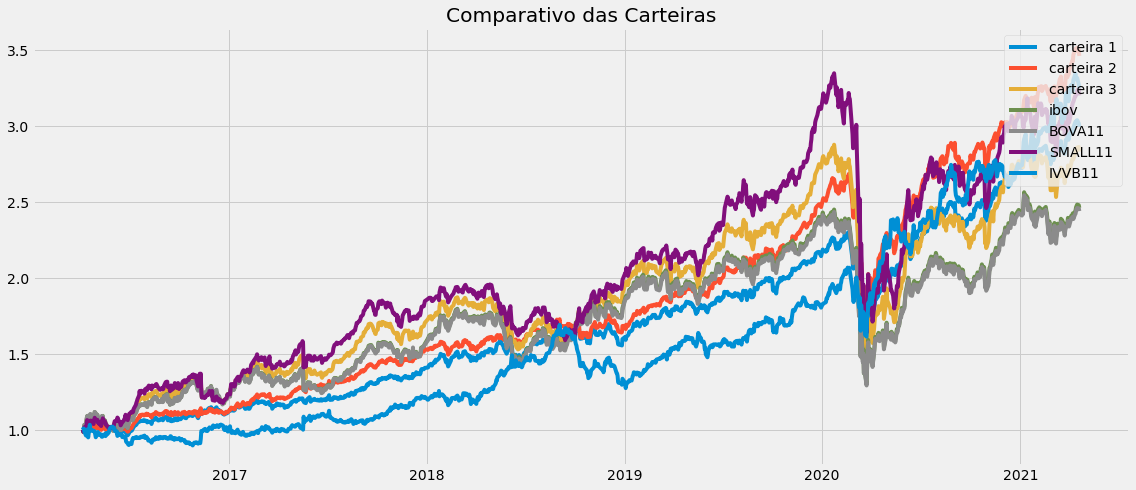

In [16]:
plt.figure(figsize=(17.5,7.5))
plt.plot(cart_normal['carteira 1'], label = 'carteira 1')
plt.plot(cart_normal['carteira 2'], label = 'carteira 2')
plt.plot(cart_normal['carteira 3'], label = 'carteira 3')
plt.plot(cart_normal['ibov'], label = 'ibov')
plt.plot(cart_normal['BOVA11'], label = 'BOVA11')
plt.plot(cart_normal['SMALL11'], label = 'SMALL11')
plt.plot(cart_normal['IVVB11'], label = 'IVVB11')
plt.title('Comparativo das Carteiras')
plt.legend(loc = 'upper right')
plt.show()

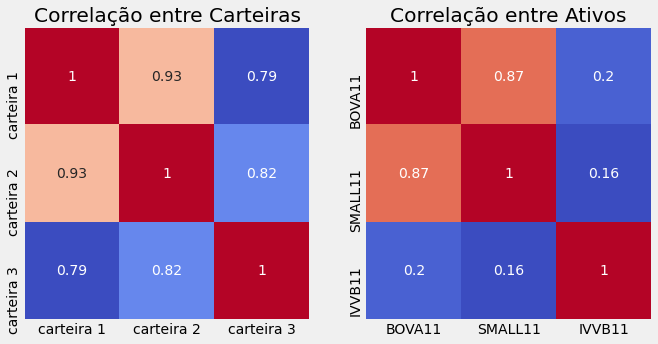

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.set_title('Correlação entre Carteiras')
sns.heatmap(carteiras.corr().iloc[:3,:3],
           annot=True, cmap='coolwarm',
           ax=ax1, cbar=False);

ax2.set_title('Correlação entre Ativos')
sns.heatmap(carteiras.corr().iloc[4:,4:],
           annot=True, cmap='coolwarm',
           ax=ax2, cbar=False);

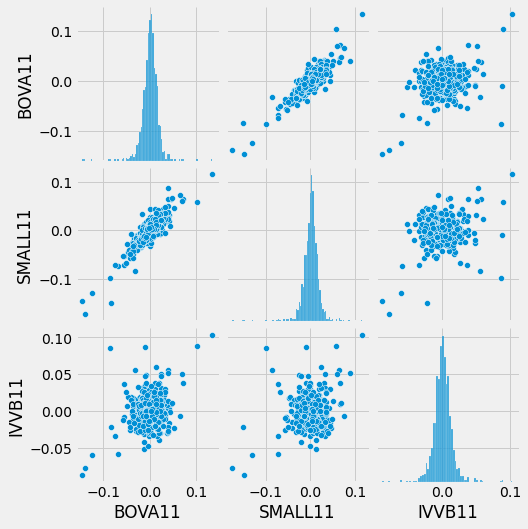

In [21]:
sns.pairplot(carteiras.iloc[:,4:]);

In [23]:
result = pd.DataFrame(index=['retorno total', 'volatilidade'], columns=carteiras.columns)
result.loc['volatilidade'] = carteiras.std()*252**0.5
result.loc['retorno total'] = cart_normal.iloc[-1] - 1

In [24]:
result.applymap(lambda x: f'{x: .1%}')

,carteira 1,carteira 2,carteira 3,ibov,BOVA11,SMALL11,IVVB11
retorno total,199.5%,246.2%,183.2%,146.1%,144.0%,220.2%,224.9%
volatilidade,19.3%,19.6%,27.3%,27.2%,27.5%,29.1%,22.1%
